# Project 1

## Ask

For your first project, you are asked to

1. Identify and load a network dataset that has some categorical information available for each node.
2. For each of the nodes in the dataset, calculate degree centrality and eigenvector centrality.
3. Compare your centrality measures across your categorical groups.

## Overview

For my first project I will be using Amazon electronic Data set reviews and analysing using network anaylis the difference between higher rated items versus lower rated items. I hypothesize that the items with the higher reviews will have more connections than the items that are lower rated.

In [2]:
import networkx as nx
from networkx.algorithms import approximation as approx
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/MengtingWan/marketBias/master/data/df_electronics.csv')

Here is a peak of the data and how it is structured. It has an item_id, a user_id, rating, timestamp of the rating, the gender of the item and brand.

In [4]:
df.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0


## Data Exploration

For this analysis, I will use the rating, userid and item id. 

(array([143755.,      0.,      0.,      0.,      0.,  78648.,      0.,
             0.,      0.,      0., 100630.,      0.,      0.,      0.,
             0., 214166.,      0.,      0.,      0., 755755.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4,
        3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <BarContainer object of 20 artists>)

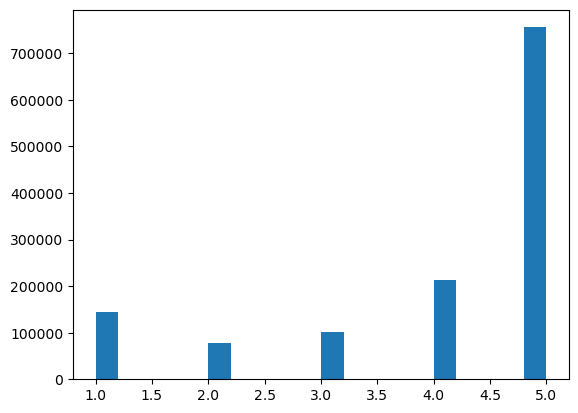

In [5]:
plt.hist(df['rating'], bins=20)

The most common rating in this dataset is 5. The rating 5 has over 700,000 votes. The second most common rating is 4 followed by the value 1. 

(array([481171.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0., 382068.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0., 429715.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 20 artists>)

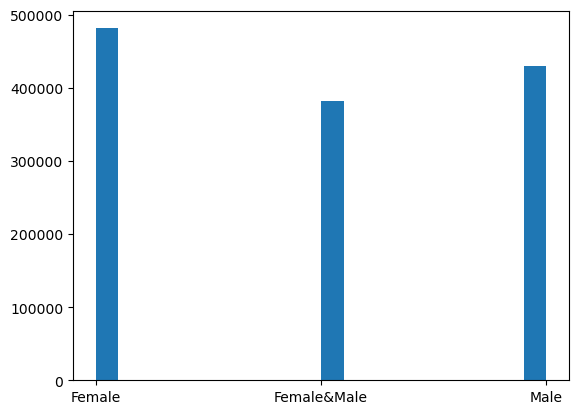

In [6]:
plt.hist(df['model_attr'], bins=20)

The distribution of gender categories in this dataset. There are more Female than male. The Female category has close to 500,000 items. The second most common category is Male, followed by Female & Male. 

(array([143370.,      0., 322938.,      0., 359334.,      0., 192573.,
             0.,  32057.,      0.,      0.,  24193.,      0., 158598.,
             0.,  33070.,      0.,  10806.,      0.,  16015.]),
 array([0.  , 0.45, 0.9 , 1.35, 1.8 , 2.25, 2.7 , 3.15, 3.6 , 4.05, 4.5 ,
        4.95, 5.4 , 5.85, 6.3 , 6.75, 7.2 , 7.65, 8.1 , 8.55, 9.  ]),
 <BarContainer object of 20 artists>)

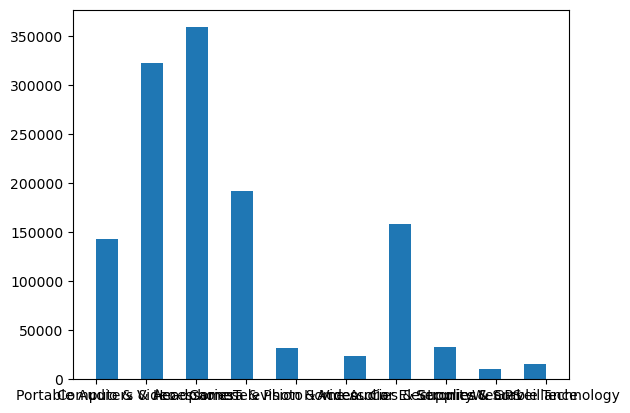

In [7]:
plt.hist(df['category'], bins=20)

The above graph shows the distribution of the categories in this dataset. The most common category is 

## Split by Categorical Data 

## Create Graph

## Split by Ratings 

### One Dataframe will be less than 3 and the other Greater than  and equal to 3

I will create two dataframes dividing it by the ratings available. The `high_rating_df` contains the reviews where the ratings were greater than or equal to 3. The dataframe `low_rating_df` contains the reviews where the ratings were less than 3. 

In [8]:
high_rating_df = df[df['rating'] >= 3]
low_rating_df = df[df['rating'] < 3] 


My hypotheses is that there is a statistical difference between the degree centrality in the high rating dataset than the low rating dataset. 

In [9]:
high_rating_graph = high_rating_df[['item_id', 'user_id', 'rating']]
low_rating_graph = low_rating_df[['item_id', 'user_id', 'rating']]

H = nx.from_pandas_edgelist(high_rating_graph, source= 'user_id', target='item_id', edge_attr='rating')
L = nx.from_pandas_edgelist(low_rating_graph, source= 'user_id', target='item_id', edge_attr='rating')

### The Number of Edges

In [10]:
H.number_of_edges()

1070551

In [11]:
L.number_of_edges()

222403

### The Number of Nodes

In [12]:
H.number_of_nodes()

965140

In [13]:
L.number_of_nodes()

223236

## High Graph

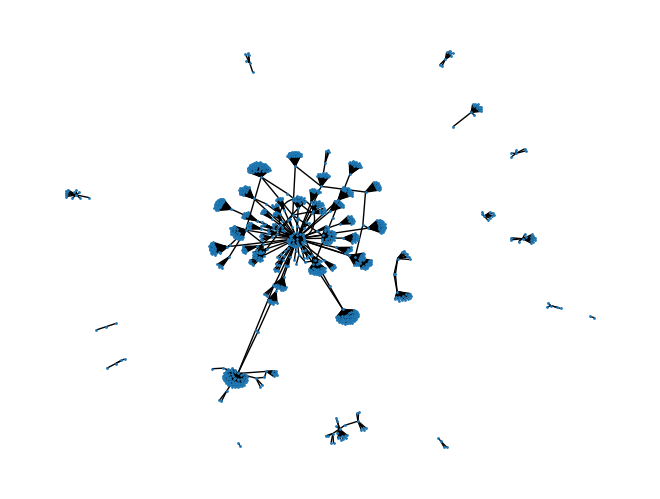

In [14]:
H_subset = high_rating_graph.iloc[0:999]
H_subset_graph = nx.from_pandas_edgelist(H_subset, source= 'user_id', target='item_id', edge_attr='rating')
nx.draw(H_subset_graph, node_size=1)

### Degree Centrality

In [15]:
H_degree_centrality = nx.degree_centrality(H)
H_degree_centrality

{0: 9.014245616434523e-05,
 1: 4.662540836086823e-05,
 2: 0.00330833175325005,
 6: 1.0361201857970717e-05,
 8: 8.288961486376574e-06,
 9: 4.144480743188287e-06,
 12: 1.6577922972753148e-05,
 13: 3.211972575970922e-05,
 14: 6.009497077623016e-05,
 15: 1.1397322043767789e-05,
 16: 2.901136520231801e-05,
 17: 0.0007542954952602682,
 19: 9.325081672173645e-06,
 20: 5.1806009289853585e-06,
 21: 2.0722403715941434e-05,
 23: 2.5903004644926793e-05,
 24: 5.6986610218838946e-05,
 25: 1.6577922972753148e-05,
 26: 2.0722403715941434e-05,
 27: 6.216721114782431e-06,
 30: 1.1397322043767789e-05,
 31: 8.288961486376574e-06,
 32: 1.3469562415361933e-05,
 33: 0.00046107348267969693,
 34: 1.5541802786956075e-05,
 35: 7.252841300579502e-06,
 36: 1.865016334434729e-05,
 37: 2.6939124830723867e-05,
 39: 6.838393226260674e-05,
 40: 4.0408687246085795e-05,
 42: 8.288961486376574e-06,
 43: 0.0017997407627295136,
 44: 1.761404315855022e-05,
 45: 1.3469562415361933e-05,
 46: 2.6939124830723867e-05,
 47: 8.2889

In [16]:
H_degree_list = [*H_degree_centrality.values()]

## Low Graph

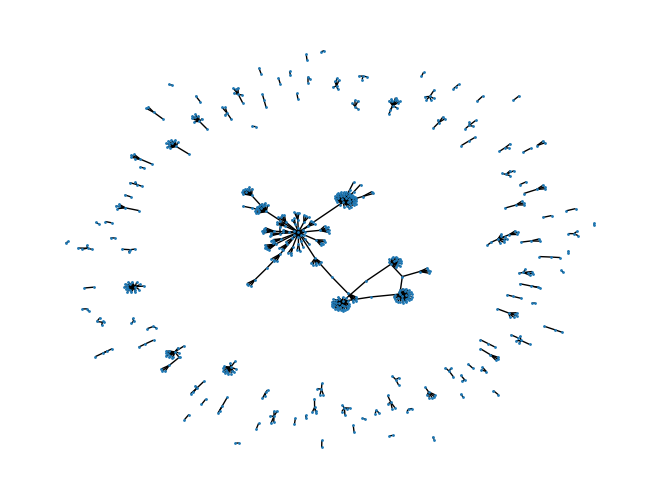

In [17]:
L_subset = low_rating_graph.iloc[0:599]
L_subset_graph = nx.from_pandas_edgelist(L_subset, source= 'user_id', target='item_id', edge_attr='rating')
nx.draw(L_subset_graph, node_size=1)

### Degree Centrality 

In [18]:
L_degree_centrality = nx.degree_centrality(L)
L_degree_centrality

{3: 0.0002598158890854929,
 0: 0.00014334669742647883,
 4: 2.2397921472887316e-05,
 5: 4.031625865119717e-05,
 7: 0.00011198960736443658,
 10: 2.2397921472887316e-05,
 11: 1.343875288373239e-05,
 18: 1.343875288373239e-05,
 22: 1.7918337178309853e-05,
 28: 2.687750576746478e-05,
 29: 2.2397921472887316e-05,
 38: 1.7918337178309853e-05,
 41: 2.687750576746478e-05,
 48: 3.135709006204224e-05,
 51: 1.343875288373239e-05,
 53: 1.343875288373239e-05,
 65: 3.5836674356619706e-05,
 67: 1.7918337178309853e-05,
 70: 4.479584294577463e-06,
 74: 1.7918337178309853e-05,
 77: 0.00014782628172105628,
 1: 6.271418012408448e-05,
 84: 4.479584294577463e-05,
 86: 4.479584294577463e-05,
 91: 3.5836674356619706e-05,
 93: 4.92754272403521e-05,
 94: 4.479584294577463e-05,
 97: 4.031625865119717e-05,
 99: 5.823459582950702e-05,
 112: 3.135709006204224e-05,
 115: 1.343875288373239e-05,
 123: 2.687750576746478e-05,
 6: 4.479584294577463e-06,
 135: 1.343875288373239e-05,
 140: 6.719376441866195e-05,
 145: 0.000

In [19]:
L_degree_list = [*L_degree_centrality.values()]

### Eigenvectors

Diameter

In [ ]:
https://www.geeksforgeeks.org/how-to-conduct-a-two-sample-t-test-in-python/

### Statistical Test


Whether the two samples data groups are independent.
Whether the data elements in respective groups follow any normal distribution.
Whether the given two samples have similar variances. This assumption is also known as the homogeneity assumption.

In [21]:
import seaborn as sns
import numpy as np


In [25]:
plt.hist(L_degree_list)

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x139963740> (for post_execute):


KeyboardInterrupt: 

In [23]:
ax = sns.barplot(x=np.arange(len(H_degree_list)), y=H_degree_list)
ax.bar_label(ax.containers[0])
plt.axis('off')
plt.show()

AttributeError: 'bool' object has no attribute 'all'